<a href="https://colab.research.google.com/github/HSV-AI/presentations/blob/master/2019/191002_Data_Analysis_Jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Data with Jupyter Notebook

Welcome to Huntsville AI. This week we are continuing to work through some technical tutorials in preparation for the NASA Space Apps Challenge.

If you are interested in joining Huntsville AI, please connect through one or more of our communication channels.

[Facebook Group](https://www.facebook.com/groups/390465874745286/)

[LinkedIn Group](https://www.linkedin.com/groups/12177562/)

[Meetup Group](https://www.meetup.com/Huntsville-AI/)

[Github Page](https://github.com/HSV-AI)

This notebook is based in part on the Data Science Handbook by Jake VanderPlas that you can find [here](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/Index.ipynb)



## IPython Tips

Here are a few tips that will help you get started using a Jupyter Notebook.

### Tip 1 - Help

You can use the ? character at the end of a function or type to access the help for that function or type.

In [0]:
# Let's create a list and see how to get the length
v = [1.0, 2.0, 3.0]
len?

In [0]:
len(v)

In [0]:
# We can even get information about the list itself:
v?

In [0]:
# Let's create a function with a helpful description
def empty_function():
  """This is just an empty function. Please don't call it."""
  return 1

In [0]:
# Now the description is available by asking for help
empty_function?

In [0]:
# Two question marks will display the source for the function
empty_function??

### Tip 2 - Tab Completion

Well, I was going to add a section about how to use the \<TAB\> key to autocomplete, but it appears that Colab already has that feature built into the editor.

Just in case, try the command 

?>v.\<TAB\> 

below:

### Tip 3 - Magic Commands

No really, they are called magic because they start with a '%'

One of the most useful commands that can be used to split up a large notebook is the %run magic command. Using it, you
can run external python scripts or even IPython notebooks 
inside the context of the current notebook.

An example of this can be found in the HSV-AI Bug Analysis notebook [here](https://colab.research.google.com/github/HSV-AI/bug-analysis/blob/master/Doc2Vec.ipynb)

Two other very useful magic commands are **%time** and **%timeit**


In [0]:
# Using an example directly from VanderPlas:
print("Here's the output of the %timeit command:")
%timeit L = [n ** 2 for n in range(1000)]

print("\nHere's the output of the %time command:")
%time  L = [n ** 2 for n in range(1000)]

### Tip 4 - Suppressing Output

Jupyter will send the result of the last command from a cell to the output. Sometimes you just want it to stay quiet though - especically if you are generating plots and other items that do not need the ouput text inserted.

In order to suppress the output, just end the line with a ';'

In [0]:
# This code has output
p1 = 'This little piggy had roast beef'
p1

In [0]:
# This code does not have output
p2 = 'This little piggy had none'
p2;

### Tip 5 - %history Magic

This particular piece of magic is very helpful when you may have run cells out of order and are trying to troubleshoot what happened in what order.

In [0]:
%history

### Tip 6- Shell Commands

Most Linux shell commands are available from the Jupyter notebook as well. One good example is shown below and sets us up to start doing some data analysis.

In [4]:
!wget https://data.nasa.gov/api/views/gh4g-9sfh/rows.csv

--2019-10-02 22:10:43--  https://data.nasa.gov/api/views/gh4g-9sfh/rows.csv
Resolving data.nasa.gov (data.nasa.gov)... 128.102.186.77, 2001:4d0:6311:2c05:60b0:5ad8:1210:ea07
Connecting to data.nasa.gov (data.nasa.gov)|128.102.186.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv’

rows.csv                [       <=>          ]   4.55M  3.11MB/s    in 1.5s    

2019-10-02 22:10:46 (3.11 MB/s) - ‘rows.csv’ saved [4769811]



## NASA Data

The data that we will be analyzing is described [HERE](https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh)

This comprehensive data set from The Meteoritical Society contains information on all of the known meteorite landings. The Fusion Table is collected by Javier de la Torre and we've also provided an XLS file that consists of 34,513 meteorites.

## Pandas Dataframes

[https://pandas.pydata.org/](https://pandas.pydata.org/)

pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

Pandas datafames are a great way to work with tabular data.

There are several ways to load a dataframe from common file formats like json and csv.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('rows.csv')

# Now let's look at the columns available in the dataframe
print(df.columns)
print(df.dtypes)

Index(['name', 'id', 'nametype', 'recclass', 'mass (g)', 'fall', 'year',
       'reclat', 'reclong', 'GeoLocation'],
      dtype='object')
name            object
id               int64
nametype        object
recclass        object
mass (g)       float64
fall            object
year            object
reclat         float64
reclong        float64
GeoLocation     object
dtype: object


In [0]:
# We can also get an idea of the data by using the head function
df.head

## Dataframe copy vs view

One thing to keep in mind when working with Pandas is the behavior differences with working with a copy of a dataframe vs a view/reference of a dataframe.

Working with a copy keeps your changes separate, but causes more memory overhead than working with a view.

In [0]:
# We can copy columns of the dataframe into a new dataframe
df_copy = df[['name', 'id']]

df_copy.head

In [0]:
# We can see that these two items point to different memory addresses

print(id(df))
print(id(df_copy))

In [0]:
# Changes to the copy do not affect the original
df_copy['id'] = 0

print(df_copy.head)

print(df.head)

In [0]:
# We can also create a view of the dataframe
df_view = df.iloc[:,:]

print(id(df_view))
print(id(df))

In [0]:
# Changes to the view also update the dataframe
df_view.iloc[:, 1] = 0

print(df_view.head)

print(df.head)

## Updating values in a Dataframe

In [0]:
df.year

In [0]:

def updateDate(x):
  if isinstance(x, float):
    return int(0)
  else:
    return int(x[6:10])
  
df.year = df.year.apply(lambda x: updateDate(x))


In [0]:
df.year

In [0]:
df = df[df.year > 0]

## Matplotib

[https://matplotlib.org/](https://matplotlib.org/)

Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shells, the Jupyter notebook, web application servers, and four graphical user interface toolkits.

There are also some helper methods from Pandas that will automatically create a plot in matplotlib for you.

In [0]:
# First, let's put together a plot of the number of meteorite landings per year

grouped = df.loc[:,['id','year']].groupby('year').count()
grouped.columns = ['count']
grouped.sort_values(by='year').plot(kind='bar', figsize=(15,10))
plt.show()

In [0]:
# Since we have the mass of each meteorite, we might as well figure
# out the mean per year and plot that as well.

grouped = df.loc[:,['mass (g)','year']].groupby('year').mean()
grouped.columns = ['avg']
grouped.sort_values(by='year').plot(kind='bar', figsize=(15,10))
plt.show()

### Installing Basemap on Colab

In [0]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

In [0]:
!pip install pyproj==1.9.6

### Geographic Map

In [0]:
#@title Year of Impact
#@markdown Forms support many types of fields.
year = 2007 #@param {type:"slider", min:2000, max:2010, step:1}
#@markdown ---


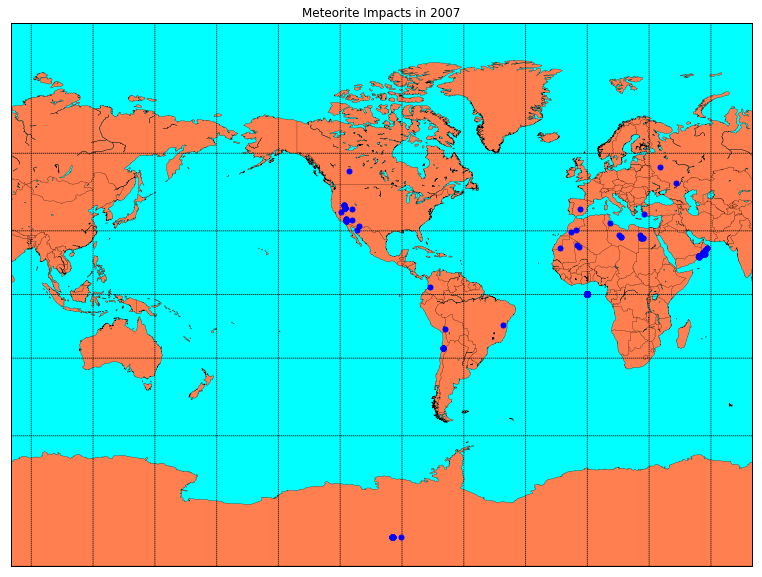

In [35]:
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(15,10))

map = Basemap(projection='mill',lat_0=0,lon_0=-100,resolution='l')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='coral',lake_color='aqua')
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))

df_year = df[df.year == year]
x,y = map(df_year.reclong.values, df_year.reclat.values)
map.plot(x, y, 'bo', markersize=5)

plt.title('Meteorite Impacts in '+str(year))
plt.show()

## Wrap-up

So, that's a quick introduction to doing Data Analysis with Jupyter Notebook.

If you have any questions, please drop me a line at:

[https://hsv-ai.com/contact/](https://hsv-ai.com/contact/)